# Text Classification

Automatic document classification techniques include:

    Expectation maximization (EM)
    Naive Bayes classifier
    Tf-idf
    Latent semantic indexing
    Support vector machines (SVM)
    Artificial neural network
    K-nearest neighbour algorithms
    Decision trees such as ID3 or C4.5
    Concept Mining
    Rough set based classifier
    Soft set based classifier
    Multiple-instance learning
    Natural language processing approaches
    
需要注意：LDA等Topic Models[`codex/py/NLP/Latent Dirichlet Allocation.ipynb`]属于无监督学习，不用于classification

# 以下为一个完整的 Web Crawler + BoW / TF-IDF + Logistic Regression 的例子

这是一个多分类的例子，根据输入的新闻文本，判读主题类型（人才、体育、卫生等）。

# Web Crawler

参考 [Web Crawler.ipynb](Web Crawler.ipynb)

# Data Preprocessing

合并多个来源的数据文件，参考[Preprocessing.ipynb](Preprocessing.ipynb)

# Load Data

Load hdf5 Data in Zip

In [1]:
import zipfile
import io
import os.path
import pandas as pd

with zipfile.ZipFile('FoodSafetyAriticles.zip', 'r') as z:
    for filename in z.namelist(): 
        
        # 解压h5文件
        if (os.path.isfile(filename) == False):
            z.extract(filename)
        
        # 加载h5文件
        with pd.HDFStore(filename,  mode='r') as newstore:
            df = newstore.select('df')
z.close()

C:\Users\eleve\Anaconda3\lib\site-packages\tables\leaf.py:410: PerformanceWarning: The Leaf ``/df/_i_table/content/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


In [2]:
df

,label,src,url,date,title,content
0,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26918.html,2018/0424,山东省高级人民法院公布四起典型案例,\n\n\n 山东省高级人民法院审判委员会专职审判委员韩芳丽介绍说，危害食品安全犯罪不仅扰...
1,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26917.html,2018/0424,青岛公布危害食药安全犯罪典型案例,\n\n\n 案例1：用工业用火碱、工业用甲醛加工小银鱼\n \n 2014年7月至今，...
2,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26915.html,2018/0424,食品微生物快速检测技术研究,\n\n\n 为保障食品安全，减少食源性疾病的发生，食源性致病菌的检测显得尤为关键。传统的...
3,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26914.html,2018/0424,检测实验室申请认可的关键环节,\n\n\n 实验室认可作为认可的重要门类，是国际通用的对实验室进行能力评价的方式。目前，...
4,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26913.html,2018/0424,甜酒酿的制作,\n\n\n 中国酿酒历史可追溯到磁山文化时期，距今已经有7000多年。1600年前的晋代...
...,...,...,...,...,...,...
5594,财经,NaN,NaN,NaN,NaN,\n \n\n 日前，新兴铸管和申能股份的增发申请在2005年第3次股票发行审核委员会工作...
5595,财经,NaN,NaN,NaN,NaN,\n “村里的消费者投诉站真顶事！我的1600元农膜钱全要回来了。”日前，正忙于春耕的河北省...
5596,财经,NaN,NaN,NaN,NaN,\n \n\n 央行上海分行上周末公布的2005年第一季度上海市货币运行监测报告显示：截至...
5597,财经,NaN,NaN,NaN,NaN,\n \n\n 3月17日，央行将超额准备金率从1.62％下调到0.99％，这致使人民币理...


In [3]:
print(df.groupby(['label'])['label'].count())
df.count()

label
人才        44
体育       200
卫生       101
娱乐       108
房产        66
教育        58
汽车        42
电脑       210
科技        75
财经        47
食品安全    4648
Name: label, dtype: int64


label      5599
src        4648
url        4648
date       4648
title      4648
content    5599
dtype: int64

# Create Data Sets

创建2组数据集：  
2分类：食品安全 1000样本 | 其它 1000样本   
多分类：每类100-200样本

In [4]:
# 构造二分类数据集

df_food = df[df['label'] == '食品安全'].sample(frac=0.2)
#print(df_food.count())
df_others = df[df['label'] != '食品安全']
#print(df_others.count())
df_train_b = df_food.append(df_others)
#print(df_train_b.count())
print(df_train_b.groupby(['label'])['label'].count())

label
人才       44
体育      200
卫生      101
娱乐      108
房产       66
教育       58
汽车       42
电脑      210
科技       75
财经       47
食品安全    930
Name: label, dtype: int64


In [4]:
# 构造多分类数据集

df_food = df[df['label'] == '食品安全'].sample(frac=0.04)
#print(df_food.count())
df_others = df[df['label'] != '食品安全']
#print(df_others.count())
df_train_n = df_food.append(df_others)
#print(df_train_n.count())
print(df_train_n.groupby(['label'])['label'].count())

label
人才       44
体育      200
卫生      101
娱乐      108
房产       66
教育       58
汽车       42
电脑      210
科技       75
财经       47
食品安全    186
Name: label, dtype: int64


# Stop Words

In computing, stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search. 

In [5]:
%run get_stop_words.py
stpwrdlst = get_stop_words()
print(len(stpwrdlst))

2680


# 分词

参考: [Word Segmentation.ipynb](Word Segmentation.ipynb)

In [6]:
import jieba

# Get histogram
def word_frequency(s, stpwrdlst):
    jieba.add_word('气相色谱')
    jieba.add_word('液相色谱')
    jieba.add_word('区块链')
    jieba.add_word('打call')
    jieba.add_word('一物一码')
    wordfreq = {}
    wordlist = list(jieba.cut(s, cut_all=False))
    for w in set(wordlist):
        if w not in stpwrdlst:            
            wordfreq[w] = wordlist.count(w)
            
    return wordfreq

# Bag of Word 

The BoW model captures the frequencies of the word occurrences in a text corpus.  
e.g., BOW(doc_1): [1,1,1,2,1,1,0,0]

In [7]:
def doc2bow(s, stpwrdlst, vocab):
    wf = word_frequency(s, stpwrdlst)
    a = np.zeros(len(vocab))
    for i,w in enumerate(vocab):
        if w in wf.keys():
            a[i] = wf[w]
    return a 

### Generate global vocab and document-term matrix X
X矩阵为m*n，m为文档数，n为单词数，用于记录每行文档单词出现的次数（词频）  

### 方法1

* 对于英文文本，可以直接使用sklearn.feature_extraction.text.CountVectorizer  
* 对于中文文本，可以分词后用空格作为分隔符重新组装文本，再使用sklearn.feature_extraction.text.CountVectorizer  

In [12]:
%run DTM_CHN.py
# _, X, vocab = DTM_CHN( df['content'].values)

In [9]:
X.shape

(5599, 115181)

### 方法2

In [23]:
X.shape

(5599, 122222)

## TF-IDF矩阵

[`codex/py/NLP/TF-IDF.ipynb`]

X 为 DTM (document-term matrix), shape = (n_doc, n_word)。  
由 X 可以计算得到TF-IDF矩阵。后续分类器可以使用X或TF-IDF。通常认为TF-IDF的分类效果更优。

In [10]:
%run tf_idf_matrix.py
TF_IDF, IDF = tf_idf_matrix(X)

# Logistic Regression (二分类) using DTM

In [60]:
df_train = df_train_b
Text = df_train['content'].values
labels = df_train['label'].values

%run DTM_CHN.py
_, X, vocab = DTM_CHN(Text, ['气相色谱','液相色谱','区块链','打call','一物一码'] ,stpwrdlst)
y = (labels == '食品安全')

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 训练 (using L1 and L2 penalties)

0.9821428571428571


<BarContainer object of 1000 artists>

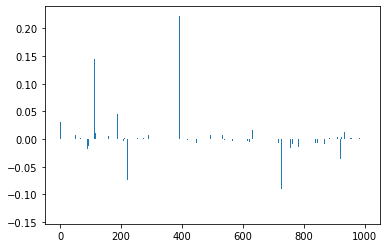

In [75]:
from sklearn.linear_model import LogisticRegression
# ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.
clf = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l2').fit(X_train, y_train)
print(clf.score(X_test, y_test))

import matplotlib.pyplot as plt  
%matplotlib inline
coef = list(clf.coef_.flatten())[:1000]
plt.bar(range(len(coef)), coef)

C:\Users\eleve\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9794642857142857


<BarContainer object of 1000 artists>

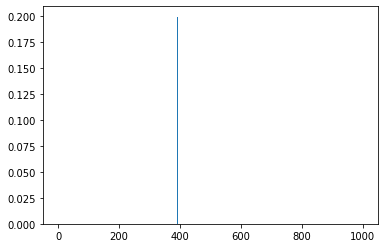

In [84]:
from sklearn.linear_model import LogisticRegression
# ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.
clf = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l1').fit(X_train, y_train)
print(clf.score(X_test, y_test))

import matplotlib.pyplot as plt  
%matplotlib inline
coef = list(clf.coef_.flatten())[:1000]
plt.bar(range(len(coef)), coef)

## 影响分类的关键词

In [87]:
# np.array(vocab)[np.where(np.abs(clf.coef_)>0.1)[1]] # get key words
# vocab[np.where(np.abs(clf.coef_)>0.1)[1]]
keywords = {}
for idx in np.where(np.abs(clf.coef_)>0.1)[1]:
    # print(idx, vocab[idx], round(clf.coef_[0][idx],3))
    keywords[vocab[idx]] = clf.coef_[0][idx]
sorted_keywords = sorted(keywords.items(), key=lambda x: -abs(x[1]))
for idx,x in enumerate(sorted_keywords):
    print(idx+1, x[0], round(x[1],3))
    # print(x)

1 关键字 1.683
2 比赛 -1.529
3 电脑 -1.437
4 本刊 1.286
5 食品安全 1.236
6 食用 1.217
7 食品 0.987
8 网友 0.957
9 水果 0.938
10 丙烯 -0.938
11 食安 0.908
12 微软 -0.897
13 汽车 -0.874
14 运营商 -0.865
15 河北省 -0.851
16 医生 -0.802
17 公告 0.78
18 球员 -0.778
19 推出 -0.755
20 食品药品 0.71
21 加工 0.688
22 新加坡 -0.669
23 一页 0.652
24 相关 0.651
25 美食 0.649
26 保存 0.611
27 有限公司 0.6
28 华林 -0.591
29 演出 -0.586
30 污染 0.586
31 音乐 -0.572
32 酸性 -0.559
33 白酒 0.551
34 人才 -0.548
35 公斤 0.547
36 餐饮 0.547
37 电影 -0.544
38 进口 0.542
39 新西兰 0.536
40 一对 -0.53
41 德国 -0.521
42 餐厅 0.52
43 食物 0.517
44 成功 -0.515
45 吃货 0.508
46 储存 -0.505
47 sk -0.504
48 昨天 -0.497
49 拿下 -0.491
50 轿车 -0.49
51 天牛 -0.484
52 推进 0.481
53 成渝 -0.48
54 销售 0.477
55 机会 -0.464
56 专辑 -0.464
57 病人 -0.456
58 饮料 0.453
59 客户 0.452
60 两个 -0.449
61 解决方案 0.448
62 小龙虾 0.448
63 事件 0.446
64 去年 -0.446
65 消失 -0.442
66 3g -0.436
67 组屋 -0.429
68 超市 0.422
69 手机 -0.417
70 用户 -0.413
71 饮用 0.412
72 palm -0.408
73 养殖 0.406
74 牛奶 0.402
75 通讯 -0.397
76 近日 0.397
77 人士 -0.394
78 考试 -0.389
79 歌曲 -0.389
80 客厅 -0.38

L1 得到的关键词少于L2得到的关键词

## 测试

使用外部测试数据

In [85]:
t = '《中华人民共和国食品安全法》是中国全国人民代表大会常务委员会批准的中国国家法律文件。'
a = doc2bow(t, stpwrdlst, vocab)

print(clf.predict_proba([a]))
print(clf.predict([a]))

[[0.18216092 0.81783908]]
[ True]


In [86]:
t = '体育运动是在人类发展过程中逐步开展起来的有意识地对自己身体素质的培养的各种活动。采取了各种走、跑、跳、投以及舞蹈等多种形式的身体活动'
a = doc2bow(t, stpwrdlst, vocab)

print(clf.predict_proba([a]))
print(clf.predict([a]))

[[0.5728349 0.4271651]]
[False]


若使用L2 penalty，上例易出现假阳性。但概率分布比较靠近50%阈值。整体上，L1 penalty的泛化能力略胜

# Logistic Regression (多分类) using TF-IDF Matrix

## 训练

In [14]:
df_train = df_train_n
Text = df_train['content'].values
labels = df_train['label'].values

%run DTM_CHN.py
_, X, vocab = DTM_CHN(Text, ['气相色谱','液相色谱','区块链','打call','一物一码'] ,stpwrdlst)
y = labels

100%|██████████████████████████████████████████████████████████████████████████████| 1137/1137 [00:21<00:00, 53.20it/s]


In [15]:
TF_IDF, IDF = tf_idf_matrix(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(TF_IDF, y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
# ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.
clf = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l2').fit(X_train, y_train)

clf.score(X_test, y_test)

0.9254385964912281

## 测试

In [17]:
t = '《中华人民共和国食品安全法》是中国全国人民代表大会常务委员会批准的中国国家法律文件。'
a = doc2bow(t, stpwrdlst, vocab) * IDF

print(clf.predict_proba([a]))
print(clf.predict([a]))

[[0.05703009 0.07478489 0.0614852  0.06077931 0.0608666  0.09815941
  0.05677867 0.09539708 0.06685469 0.07121976 0.29664431]]
['食品安全']


In [18]:
t = '体育运动是在人类发展过程中逐步开展起来的有意识地对自己身体素质的培养的各种活动。采取了各种走、跑、跳、投以及舞蹈等多种形式的身体活动'
a = doc2bow(t, stpwrdlst, vocab) * IDF

print(clf.predict_proba([a]))
print(clf.predict([a]))

[[0.07168668 0.06851798 0.0980122  0.07771474 0.078514   0.16692924
  0.06714243 0.06548556 0.0947578  0.07235233 0.13888704]]
['教育']


In [19]:
keywords = {}
for idx in np.where(np.abs(clf.coef_[10])>0.01)[0]:
    keywords[vocab[idx]] = clf.coef_[10][idx]
sorted_keywords = sorted(keywords.items(), key=lambda x: -abs(x[1]))
for idx,x in enumerate(sorted_keywords):
    print(idx+1, x[0], round(x[1],3))    

1 食品 0.231
2 食品安全 0.17
3 公司 -0.133
4 上帝 -0.124
5 比赛 -0.123
6 美国 -0.113
7 微软 -0.107
8 手机 -0.102
9 电脑 -0.101
10 病毒 -0.096
11 ie -0.092
12 昨天 -0.091
13 食品药品 0.089
14 人才 -0.084
15 亿美元 -0.082
16 推出 -0.081
17 焦立 -0.081
18 巧克力 -0.078
19 地球 -0.077
20 运营商 -0.076
21 安捷伦 0.075
22 香港 -0.074
23 肉类 0.074
24 市场份额 -0.074
25 击败 -0.073
26 一种 -0.073
27 蔬菜 0.072
28 日本 -0.072
29 今早 -0.071
30 英国 -0.071
31 研究 -0.071
32 员工 -0.07
33 出价 -0.07
34 有机 0.069
35 成渝 -0.069
36 抗生素 0.068
37 电子 -0.068
38 中关村 -0.068
39 球员 -0.068
40 周初 -0.068
41 设计 -0.067
42 无线 -0.067
43 表现 -0.067
44 餐厅 0.066
45 亮相 -0.065
46 餐饮 0.065
47 天使 -0.065
48 唱机 -0.065
49 检验 0.064
50 全球 -0.063
51 物流 0.063
52 农产品 0.063
53 类黄酮 -0.062
54 占有 -0.062
55 拿下 -0.062
56 王码 -0.062
57 毕业生 -0.062
58 汽车 -0.062
59 丙烯 -0.062
60 无助 -0.061
61 主场 -0.061
62 迪斯队 -0.061
63 抢到 -0.061
64 微型 -0.061
65 用户 -0.06
66 姚明 -0.059
67 出生 -0.059
68 发现 -0.059
69 学校 -0.059
70 112 -0.059
71 婴儿 -0.059
72 去年 -0.058
73 式样 -0.058
74 轿车 -0.058
75 科学家 -0.058
76 nba -0.058
77 有意 -0.058
78 长宁区

1176 超限 -0.017
1177 国家标准 0.017
1178 格拉夫 -0.017
1179 高层次 -0.017
1180 vtx -0.017
1181 无线电波 -0.017
1182 近日 -0.017
1183 此前 -0.017
1184 公尺 -0.017
1185 症状 -0.017
1186 成价 -0.017
1187 价格 0.017
1188 谷氨酸钠 0.017
1189 第三次 -0.017
1190 过滤 -0.017
1191 人大 -0.017
1192 距离 -0.017
1193 服用 -0.017
1194 server -0.017
1195 赌城 -0.017
1196 品牌 0.017
1197 哺乳动物 -0.017
1198 软件 -0.017
1199 馊水油 0.017
1200 漏洞补丁 -0.017
1201 每周 -0.017
1202 口感 0.017
1203 合作 -0.017
1204 高档 -0.017
1205 药水 0.017
1206 太监 -0.017
1207 王舸 -0.017
1208 退休 -0.017
1209 仪式 0.017
1210 论文 -0.017
1211 300 -0.017
1212 专利 -0.017
1213 8000 -0.017
1214 艺术类 -0.017
1215 管制 -0.017
1216 皇家 -0.017
1217 作者 -0.017
1218 工业 0.017
1219 实力 -0.017
1220 虫子 0.017
1221 红色 -0.017
1222 爱伯胥 -0.017
1223 贝特 -0.017
1224 巴塞罗那 -0.017
1225 分为 -0.017
1226 吉利 -0.017
1227 第一条 -0.017
1228 凯撒 -0.017
1229 包括 -0.017
1230 链条 0.017
1231 抬高 -0.017
1232 养殖 0.017
1233 请缨 -0.017
1234 船厂 -0.017
1235 炸薯条 -0.017
1236 海德 -0.017
1237 口岸 -0.017
1238 fuel -0.017
1239 不来梅 -0.017
1240 供应链 0.017
1241 农

2225 上课 -0.011
2226 调节 0.011
2227 毫克 -0.011
2228 身手 -0.011
2229 产业链 0.011
2230 处理机 -0.011
2231 赛扬 -0.011
2232 热浪 -0.011
2233 卫生局 0.011
2234 对抗 -0.011
2235 汽电车 -0.011
2236 条件 -0.011
2237 网页 -0.011
2238 改变 -0.011
2239 营造 -0.011
2240 赛事 -0.011
2241 只以 -0.011
2242 心脏病 -0.011
2243 portege -0.011
2244 soundstation -0.011
2245 宝利通 -0.011
2246 座位 -0.011
2247 cfc 0.011
2248 冷冻箱 0.011
2249 陈列柜 0.011
2250 美国大学 -0.011
2251 部长 -0.011
2252 一下子 -0.011
2253 鸡尾酒 0.011
2254 期望 -0.011
2255 大片 -0.011
2256 不当 -0.011
2257 注册商标 0.011
2258 年纪 -0.011
2259 荷斯坦 -0.011
2260 快步 -0.011
2261 岗位 -0.011
2262 佛宝 -0.011
2263 铸胎 -0.011
2264 古堡 -0.011
2265 fda 0.011
2266 停留 -0.011
2267 批次 0.011
2268 升至 -0.011
2269 服药 0.011
2270 保质期 0.011
2271 工商所 0.011
2272 接触 -0.011
2273 坐在 -0.011
2274 腰肌劳损 -0.011
2275 政府部门 0.011
2276 高职 -0.011
2277 湖北省 -0.011
2278 原则上 -0.011
2279 投票 -0.011
2280 氨基酸 0.011
2281 仪器 -0.011
2282 结算 0.011
2283 出租车 -0.011
2284 通话 -0.011
2285 外观 -0.011
2286 上赛季 -0.011
2287 推进 0.011
2288 三洲 0.011
2289 抽水机 0.011


L1 112; L2 6870

Alternative implementation: Text Classification Using Gensim's Doc2Vec and Logistic Regression